# TP_NACA_ZHANG_Xunjie_11310840

In [1]:
%matplotlib inline 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%autosave 30

Autosaving every 30 seconds


In [2]:
numetude=11310840
xx=0.
w=8.
yz=40.
t=yz/100.
xa=xx/10.
ya=w/100.

In [3]:
def F(x,t):
    y=5.0*t*(0.2969*np.sqrt(x)-0.1260*x-0.3537*x**2+0.2843*x**3-0.1015*x**4)
    return y

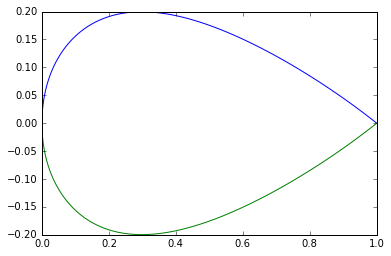

In [4]:
x=np.linspace(0,1,num=100)**2
ye=F(x,t)
yi=-F(x,t)
plt.plot(x,ye)
plt.plot(x,yi)

In [5]:
def profil_sym(x,t):          # definir le profile symétrique 
    ye=F(x,t)
    yi=-F(x,t)
    f=open("nacasym.dxf",'w')
    f.write('999''\n')
    f.write('profilsym''\n')
    f.write(' 0''\n')
    f.write('SECTION''\n')
    f.write(' 0''\n')
    for i in range(len(x)-1):
        f.write('LINE''\n')
        f.write(' 8''\n')
        f.write(' 0''\n')
        f.write(' 10''\n')
        f.write(" %f\n"%x[i])
        f.write(' 20''\n')
        f.write(" %f\n"%ye[i])
        f.write(' 30''\n')
        f.write(' 0.0000''\n')
        f.write(' 11''\n')
        f.write(" %f\n"%x[i+1])
        f.write(' 21''\n')
        f.write(" %f\n"%ye[i+1])
        f.write(' 31''\n')
        f.write(' 0.0000''\n')
    for i in range(len(x)-1):
        f.write('LINE''\n')
        f.write(' 8''\n')
        f.write(' 0''\n')
        f.write(' 10''\n')
        f.write(" %f\n"%x[len(x)-1-i])
        f.write(' 20''\n')
        f.write(" %f\n"%yi[len(x)-1-i])
        f.write(' 30''\n')
        f.write(' 0.0000''\n')
        f.write(' 11''\n')
        f.write(" %f\n"%x[len(x)-2-i])
        f.write(' 21''\n')
        f.write(" %f\n"%yi[len(x)-2-i])
        f.write(' 31''\n')
        f.write(' 0.0000''\n')
        f.write(' 0''\n')
    f.write('ENDSEC''\n')
    f.write(' 0''\n')
    f.write('EOF''\n')
    f.close()
    return

In [6]:
def ym(x,xa,ya):
    ym=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]>=xa and x[i]<=1.:
            ym[i]=ya*(1.-x[i])*(1.+x[i]-2.*xa)/((1-xa)**2)
        elif x[i]<xa and x[i]>=0.:
            ym[i]=ya*(2.*xa-x[i])*x[i]/(xa**2)
    return ym

def theta(x,xa,ya):
    theta=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]>=xa and x[i]<=1.:
            theta[i]=ya*(2.*xa-2.*x[i])/((1-xa)**2)
        elif x[i]<xa and x[i]>=0.:
            theta[i]=ya*(2.*xa-2.*x[i])/(xa**2)
    return theta    

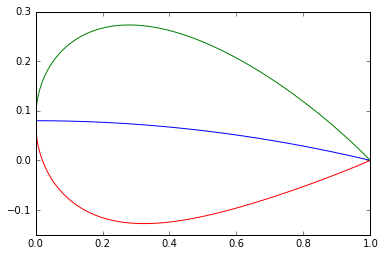

In [7]:
xe1=x-F(x,t)*np.sin(theta(x,xa,ya))
ye1=ym(x,xa,ya)+F(x,t)*np.cos(theta(x,xa,ya))
xi1=x+F(x,t)*np.sin(theta(x,xa,ya))
yi1=ym(x,xa,ya)-F(x,t)*np.cos(theta(x,xa,ya))
plt.plot(x,ym(x,xa,ya))
plt.plot(xe1,ye1)
plt.plot(xi1,yi1)

In [8]:
def profil_cam(x,t,xa,ya):        # definir nanca cambre
    xe1=x-F(x,t)*np.sin(theta(x,xa,ya))
    ye1=ym(x,xa,ya)+F(x,t)*np.cos(theta(x,xa,ya))
    xi1=x+F(x,t)*np.sin(theta(x,xa,ya))
    yi1=ym(x,xa,ya)-F(x,t)*np.cos(theta(x,xa,ya))
    f=open("nacacam.dxf",'w')
    f.write('999''\n')
    f.write('profilcam''\n')
    f.write(' 0''\n')
    f.write('SECTION''\n')
    f.write(' 2''\n')
    f.write('ENTITIES''\n')
    f.write(' 0''\n')
    for i in range(len(x)-1):
        f.write('LINE''\n')
        f.write(' 8''\n')
        f.write(' 0''\n')
        f.write(' 10''\n')
        f.write(" %f\n"%xe1[i])
        f.write(' 20''\n')
        f.write(" %f\n"%ye1[i])
        f.write(' 30''\n')
        f.write(' 0.0000''\n')
        f.write(' 11''\n')
        f.write(" %f\n"%xe1[i+1])
        f.write(' 21''\n')
        f.write(" %f\n"%ye1[i+1])
        f.write(' 31''\n')
        f.write(' 0.0000''\n')
        f.write(' 0''\n')
    for i in range(len(x)-1):
        f.write('LINE''\n')
        f.write(' 8''\n')
        f.write(' 0''\n')
        f.write(' 10''\n')
        f.write(" %f\n"%xi1[len(x)-1-i])
        f.write(' 20''\n')
        f.write(" %f\n"%yi1[len(x)-1-i])
        f.write(' 30''\n')
        f.write(' 0.0000''\n')
        f.write(' 11''\n')
        f.write(" %f\n"%xi1[len(x)-2-i])
        f.write(' 21''\n')
        f.write(" %f\n"%yi1[len(x)-2-i])
        f.write(' 31''\n')
        f.write(' 0.0000''\n')
        f.write(' 0''\n')
    f.write('ENDSEC''\n')
    f.write(' 0''\n')
    f.write('EOF''\n')
    f.close()
    return
profil_cam(x,t,xa,ya)

In [9]:
def compte():     # compte nombre de ligne et colone de la nouveau txts
    F = open("pression.txt",'r')
    L=F.readline().split()
    ncol=len(L)
    nlig=1
    while(F.readline() !=""):
        nlig=nlig+1
    return nlig,ncol

In [10]:
def lecture():      # lecture les txts associés par comsol
    Fpression = open("pression.txt",'r');
    FcoorX = open("coorX.txt",'r')
    FcoorY = open("coorY.txt",'r')
    nlig,ncol=compte()
    tab1=np.zeros((nlig,ncol),dtype=float)
    tab2=np.zeros((nlig,ncol),dtype=float)
    tab3=np.zeros((nlig,ncol),dtype=float)
    for i in range(nlig):
        tab1[i,:]= Fpression.readline().split()
        tab2[i,:] = FcoorX.readline().split()
        tab3[i,:]= FcoorY.readline().split()
    pression = tab1[:,1:]
    pointX = tab2[:,1:]
    pointY = tab3[:,1:]
    teta=tab1[:,0]
    return pression,pointX,pointY,teta

In [11]:
a=1                # a=1 ,c'est deuxieme  valeur de alpha  . a=0 , c'est le premier valeur de alpha , on peut changer a pour obtenir alpha
pression,pointX,pointY,teta =lecture()
xo,yo,po=pointX[a,:],pointY[a,:] ,pression[a,:] 

In [12]:
def separe(xo,yo,po,xa,ya):         #  xo,yo,po ces sont original , xi yi pi ces sont valeurs intrados , xe ye pe ces sont valeurs extrados 
    xi=[]
    yi=[]
    xe=[]
    ye=[]  
    pi=[]
    pe=[]
    yc=ym(xo,xa,ya)
    for i in range(len(xo)):
        if yo[i]<yc[i]:
            yi.append(yo[i])
            xi.append(xo[i])
            pi.append(po[i])
        elif yo[i]>yc[i]:
            ye.append(yo[i])
            xe.append(xo[i])
            pe.append(po[i])
        elif yo[i] == yc[i] :
            yi.append(yo[i])
            xi.append(xo[i])
            pi.append(po[i])
            ye.append(yo[i])
            xe.append(xo[i])
            pe.append(po[i])
    return xi,yi,xe,ye,pi,pe

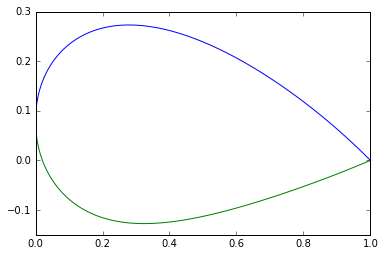

In [13]:
xi,yi,xe,ye,pi,pe=separe(xo,yo,po,xa,ya)
plt.plot(xe,ye)
plt.plot(xi,yi)

In [14]:
def arrange(xo,yo,po,xa,ya):    # xn yn pn ces sont valeurs nouveaus .
    xi,yi,xe,ye,pi,pe=separe(xo,yo,po,xa,ya)
    xn=[]
    yn=[]
    pn=[]
    for i in range(len(xi)-1):
        xn.append(xi[i])
        yn.append(yi[i])
        pn.append(pi[i])
    for i in range(len(xe)-1):
        xn.append(xe[len(xe)-1-i])
        yn.append(ye[len(xe)-1-i])
        pn.append(pe[len(xe)-1-i])
    return xn,yn,pn

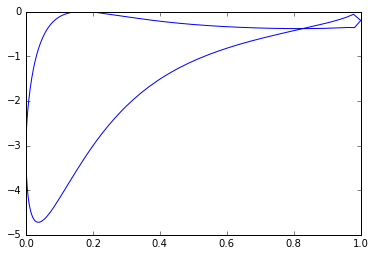

In [15]:
xn,yn,pn=arrange(xo,yo,po,xa,ya)
plt.plot(xn,pn)

In [16]:
def portance(xo,yo,xa,ya,a):       #pour calculer le centre de portance et force portance et force de trainée
    pression,pointX,pointY,teta =lecture()
    xo,yo,po=pointX[a,:],pointY[a,:] ,pression[a,:] 
    xn,yn,pn=arrange(xo,yo,po,xa,ya)
    Fpx=0.
    Fpy=0.
    dfy=0.
    dfx=0.
    sumx=0.
    sumy=0.
    for i in range(len(pn)):
        if i==0:
            Fpx=pn[i]*abs((yn[i-1]-yn[1])/2.)
            Fpy=pn[i]*abs((xn[i-1]-xn[1])/2.)
            sumx=sumx+Fpx
            sumy=sumy+Fpy
            dfx=dfx+yn[i]*Fpx
            dfy=dfy+xn[i]*Fpy
        elif i==len(pn)-1:
            Fpx=pn[i]*abs((yn[i-1]-yn[0])/2.)
            Fpy=pn[i]*abs((xn[i-1]-xn[0])/2.)
            dfx=dfx+yn[i]*Fpx
            dfy=dfy+xn[i]*Fpy
            sumx=sumx+Fpx
            sumy=sumy+Fpy
        else:
            Fpx=pn[i]*abs((yn[i-1]-yn[i+1])/2.)
            Fpy=pn[i]*abs((xn[i-1]-xn[i+1])/2.)
            dfx=dfx+yn[i]*Fpx
            dfy=dfy+xn[i]*Fpy
            sumx=sumx+Fpx
            sumy=sumy+Fpy
    yp=dfx/sumx
    xp=dfy/sumy
    ft=sumx*np.cos(teta[a])+sumy*np.sin(teta[a])
    fp=-sumx*np.sin(teta[a])+sumy*np.cos(teta[a])
    return xp,yp,ft,fp

centre=( 0.303817535077 0.0132442705149 )
force porcé et foce trainé sont ( 0.0720855562061 -2.30397463522 )


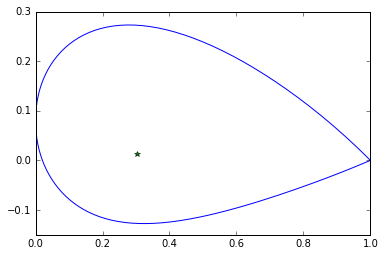

In [17]:
xp,yp,ft,fp=portance(xo,yo,xa,ya,a)
xn,yn,pn=arrange(xo,yo,po,xa,ya)
plt.plot(xn,yn)
plt.plot(xp,yp,'*')
print "centre=(",xp,yp,")"
print "force porcé et foce trainé sont (",ft,fp,")"